Install Open Dataset to bring the dataset here

In [ ]:
from google.colab import drive
import shutil, csv

In [ ]:


drive.mount('/content/drive')
shutil.copy('/content/drive/MyDrive/3 - JE-Net Data/LT_Ankle.zip', 'LT_Ankle.zip')
shutil.copy('/content/drive/MyDrive/3 - JE-Net Data/LT_Bones.zip', 'LT_Bones.zip')
shutil.copy('/content/drive/MyDrive/3 - JE-Net Data/arial.ttf', 'arial.ttf')
drive.flush_and_unmount()

Mounted at /content/drive


In [ ]:
import zipfile

Ankle_image_zip_address = '/content/LT_Ankle.zip'
Bones_image_zip_address = '/content/LT_Bones.zip'
Ankle_images_dir = '/content/LT_Ankle/'
Bones_images_dir = '/content/LT_Bones/'



In [ ]:
with zipfile.ZipFile(Ankle_image_zip_address, 'r') as zip_ref:
    zip_ref.extractall('/content')
shutil.move('LT', Ankle_images_dir)
with zipfile.ZipFile(Bones_image_zip_address, 'r') as zip_ref:
    zip_ref.extractall('/content')
shutil.move('LT', Bones_images_dir)

'/content/LT_Bones/'

Import required libraries

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import image
from PIL import Image
import numpy as np
import os, random
import torch
from torchvision import transforms

!pip install tensorflow==2.15.0
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 110.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installatio

In [ ]:
print(tf. __version__)

2.15.0


Split the data into train/test randomly and put them into sensor batch format to be used by Keras

Randomly show a Training input and its desired output, and a Test input and its desired output. The images generated each time is choosed rendomly

In [ ]:
input_images_dir = Ankle_images_dir
output_images_dir = Bones_images_dir
# [400, 980] Original size # This is set for the LT images.
# [384, 960] is very close to the size of original images dividing by 64
# but we had to resize it so it can be used in the network [288, 720] It was working with [272, 688]
image_resolutions = [304, 736] # This was good for 10K instances but now we have 15K
image_resolutions = [240, 592] # This is good for 15K instances
train_test_percentage = 0.1

def read_lines(filepath):
    with open(filepath, 'rU') as data:
        reader = csv.reader(data)
        for row in reader:
            yield [ float(i) for i in row ]




files = os.listdir(input_images_dir)
files.sort(key=lambda f: int(f.split('.')[0]))

drive.mount('/content/drive')
shutil.copy("/content/drive/MyDrive/3 - JE-Net Data/Test_Ids_LT.csv", "Test_Ids_LT.csv")
Test_Ids_filepath = 'Test_Ids_LT.csv'
Test_Ids = list(read_lines(Test_Ids_filepath))
Test_Ids_Temp = []
for line in Test_Ids:
    Test_Ids_Temp.extend(map(int, line))
test_idx = Test_Ids_Temp
drive.flush_and_unmount()

train_input_images = []
test_input_images = []

for idx, file in enumerate(files):
    if len(train_input_images) < 5000:
        my_image = tf.io.read_file(input_images_dir + file)
        tensor = tf.io.decode_image(my_image, channels=1, dtype=tf.dtypes.float32)
        tensor_image = tf.image.resize(tensor, [image_resolutions[0], image_resolutions[1]])
        # tensor_image = tf.expand_dims(tensor_image, axis=0)
        if test_idx.count(idx) > 0:
            test_input_images.append(tensor_image)
        else:
            train_input_images.append(tensor_image)

test_input_images = tf.stack(test_input_images)
train_input_images = tf.stack(train_input_images)

files = os.listdir(output_images_dir)
files.sort(key=lambda f: int(f.split('.')[0]))
train_output_images = []
test_output_images = []

for idx, file in enumerate(files):
    if len(train_output_images) < 5000:
        my_image = tf.io.read_file(output_images_dir + file)
        tensor = tf.io.decode_image(my_image, channels=1, dtype=tf.dtypes.float32)
        tensor_image = tf.image.resize(tensor, [image_resolutions[0], image_resolutions[1]])
        # tensor_image = tf.expand_dims(tensor_image, axis=0)
        if test_idx.count(idx) > 0:
            test_output_images.append(tensor_image)
        else:
            train_output_images.append(tensor_image)

test_output_images = tf.stack(test_output_images)
train_output_images = tf.stack(train_output_images)

Mounted at /content/drive


<ipython-input-7-ab068abfc169>:11: DeprecationWarning: 'U' mode is deprecated
  with open(filepath, 'rU') as data:


(-0.5, 591.5, 239.5, -0.5)

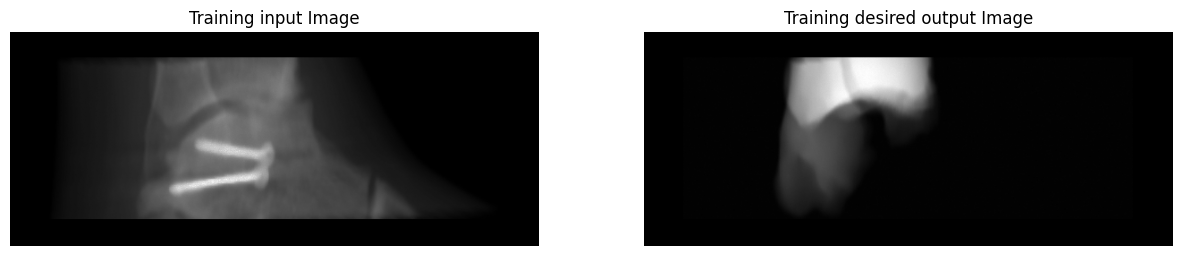

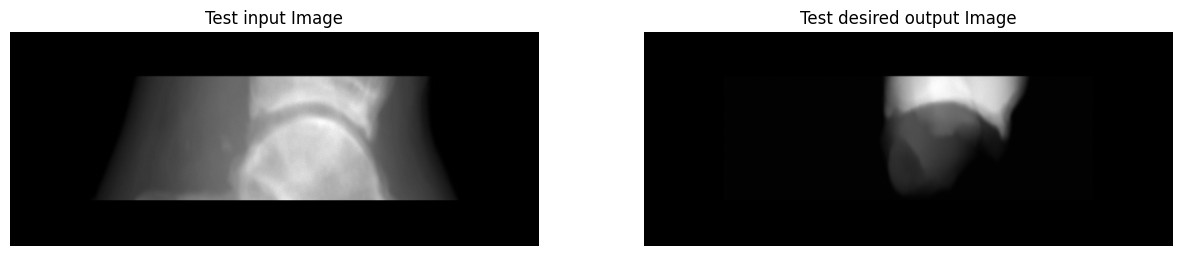

In [ ]:
%matplotlib inline
rand_idx = random.randint(0, len(train_input_images))
im1 = tf.squeeze(tf.slice(train_input_images, begin=[rand_idx,0,0,0], size=[1, image_resolutions[0], image_resolutions[1], 1]),[0,3])
im2 = tf.squeeze(tf.slice(train_output_images, begin=[rand_idx,0,0,0], size=[1, image_resolutions[0], image_resolutions[1], 1]),[0,3])

plt.rcParams['figure.figsize'] = [15, 15]
fig, ax = plt.subplots(1,2)
ax[0].imshow(im1, cmap='gray')
ax[1].imshow(im2 , cmap='gray')
ax[0].set_title('Training input Image')
ax[1].set_title('Training desired output Image')
ax[0].axis('off')
ax[1].axis('off')

rand_idx = random.randint(0, len(test_input_images))
im1 = tf.squeeze(tf.slice(test_input_images, begin=[rand_idx,0,0,0], size=[1, image_resolutions[0], image_resolutions[1], 1]),[0,3])
im2 = tf.squeeze(tf.slice(test_output_images, begin=[rand_idx,0,0,0], size=[1, image_resolutions[0], image_resolutions[1], 1]),[0,3])

fig, ax = plt.subplots(1,2)
ax[0].imshow(im1, cmap='gray')
ax[1].imshow(im2 , cmap='gray')
ax[0].set_title('Test input Image')
ax[1].set_title('Test desired output Image')
ax[0].axis('off')
ax[1].axis('off')

Config the Network and run the training process. You can also use next block of Code to load what has been trained before.

In [ ]:
from keras import backend as K
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler,ReduceLROnPlateau
from keras.optimizers import Adam

def create_model(image_resolutions, learning_rate, alpha, dropout_rate = 0.2):
    input = layers.Input(shape=(image_resolutions[0], image_resolutions[1], 1))

    # Encoder
    x = layers.Conv2D(32, (4 , 4), strides=(1, 1), activation="relu", padding="same")(input)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Conv2D(32, (4, 4), strides=(2, 2), activation="relu", padding="same")(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Conv2D(48, (4, 4), strides=(2, 2), activation="relu", padding="same")(x)
    x = layers.Conv2D(48, (4, 4), strides=(2, 2), activation="relu", padding="same")(x)
    x = layers.Conv2D(48, (4, 4), strides=(2, 2), activation="relu", padding="same")(x)

    # Decoder
    x = layers.Conv2DTranspose(48, (4, 4), strides=(2, 2), activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(48, (4, 4), strides=(2, 2), activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(48, (4, 4), strides=(2, 2), activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(32, (4, 4), strides=(2, 2), activation="relu", padding="same")(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Conv2DTranspose(32, (4, 4), strides=(1, 1), activation="relu", padding="same")(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Conv2D(1, (4, 4), activation="sigmoid", padding="same")(x)

    loss1 = ssim_loss
    loss2 = tf.keras.losses.MeanSquaredError()

    autoencoder = Model(input, x)
    optimizer = Adam(learning_rate=learning_rate)
    autoencoder.compile(optimizer=optimizer, loss=[loss1,loss2],loss_weights=[alpha,1-alpha])
    # autoencoder.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate), loss=[loss1,loss2],loss_weights=[alpha,1-alpha])  # SGD
    # autoencoder.summary()
    return autoencoder

# Loss functions
def ssim_loss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim_multiscale(y_true, y_pred, max_val=1.0, filter_size=7))

def scheduler(epoch, lr):
  match epoch:
    case 100:
        return lr*0.5
    case 130:
        return lr*0.5
    case 160:
        return lr*0.5
    case _:
        return lr

alpha = 0.9
learning_rate = 0.00005
batch_size = 8
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15, restore_best_weights=True)
#lr_shceduler = LearningRateScheduler(scheduler)
# Adjust the learning rate when the loss plateaus
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',   # The metric to monitor
    factor=0.5,           # The factor by which to decrease the learning rate (e.g., halve the LR)
    patience=10,           # How many epochs to wait before reducing the LR
    min_lr=1e-8,          # The minimum learning rate (you can set it to a small value)
    verbose=1             # Print updates when the learning rate is reduced
)

model = create_model(image_resolutions, learning_rate, alpha)

64 Training with Learning Rate: 0.005, Dropout Rate: 0.2, Batch Size: 12, Alpha = 0.95
Epoch 1/5
334/334 [==============================] - 25s 55ms/step - loss: 0.2503 - val_loss: 0.2419
Epoch 2/5
334/334 [==============================] - 17s 50ms/step - loss: 0.2415 - val_loss: 0.2419
Epoch 3/5
334/334 [==============================] - 17s 50ms/step - loss: 0.2415 - val_loss: 0.2419
Epoch 4/5
334/334 [==============================] - 17s 50ms/step - loss: 0.2415 - val_loss: 0.2419
Epoch 5/5
18/18 [==============================] - 1s 28ms/step
Average PSNR: 16.065673828125 dB
103 Training with Learning Rate: 0.0005, Dropout Rate: 0.1, Batch Size: 12, Alpha = 0.7
Epoch 1/5
334/334 [==============================] - 24s 54ms/step - loss: 0.1031 - val_loss: 0.0561
Epoch 2/5
334/334 [==============================] - 17s 50ms/step - loss: 0.0477 - val_loss: 0.0398
Epoch 3/5
334/334 [==============================] - 17s 50ms/step - loss: 0.0372 - val_loss: 0.0320
Epoch 4/5
334/334 [==

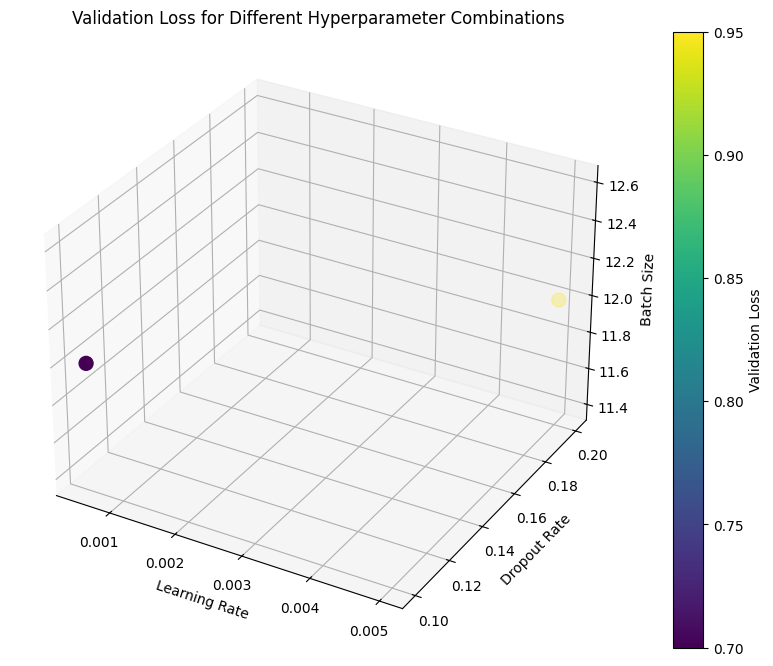

"\nplt.plot(history.history['val_loss'], label='Validation Loss')\nplt.xlabel('Epochs')\nplt.ylabel('Validation Loss')\nplt.title('Validation Loss over Epochs for the Best Model')\nplt.legend()\nplt.show()"

In [ ]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
import numpy as np

# Function to calculate PSNR between two images
def calculate_psnr(image1, image2):
    # Convert images to float32 for precision
    image1 = tf.cast(image1, tf.float32)
    image2 = tf.cast(image2, tf.float32)

    # Calculate MSE (Mean Squared Error)
    mse = tf.reduce_mean(tf.square(image1 - image2))

    # If MSE is zero, it means the images are identical, and PSNR is infinity
    if mse == 0:
        return float('inf')

    # Maximum pixel value (assuming 8-bit images)
    max_pixel_value = 1.0

    # Calculate PSNR
    psnr = 10 * tf.math.log((max_pixel_value ** 2) / mse) / tf.math.log(10.0)
    return psnr

# Assuming you have test_prediction_images and test_output_images as EagerTensors
def calculate_average_psnr(test_prediction_images, test_output_images):
    total_psnr = 0
    num_images = test_prediction_images.shape[0]  # 1500 images

    # Loop over all the images and calculate PSNR
    for i in range(num_images):
        image1 = test_prediction_images[i]
        image2 = test_output_images[i]

        psnr_value = calculate_psnr(image1, image2)
        total_psnr += psnr_value

    # Calculate average PSNR
    average_psnr = total_psnr / num_images
    return average_psnr



hp_tunning = 1
if hp_tunning == 1:
    # Hyperparameter grid search space
    learning_rates = [0.001, 0.005, 0.0005, 0.0001, 0.00005]
    dropout_rates = [0.1, 0.2, 0.3, 0.4]
    batch_sizes = [8, 12, 16]
    alpha_values = [0.95, 0.9, 0.8, 0.7]
    # Store the results for each combination
    results = []
    counter = 0;
    # Grid search manually
    for lr in learning_rates:
        for dr in dropout_rates:
            for bs in batch_sizes:
                for al in alpha_values:
                    if counter in (64, 103):
                        print(f"{counter} Training with Learning Rate: {lr}, Dropout Rate: {dr}, Batch Size: {bs}, Alpha = {al}")

                        # Create the model for the current combination of hyperparameters
                        temp_model = create_model(image_resolutions, learning_rate=lr, dropout_rate=dr, alpha = al)

                        # Train the model
                        history = temp_model.fit(
                            x=train_input_images,
                            y=train_output_images,
                            epochs=5,  # Reduced number of epochs for grid search
                            batch_size=bs,
                            validation_split=0.2,
                            verbose=1
                        )
                        predictions = temp_model.predict(test_input_images)
                        test_prediction_images = tf.convert_to_tensor(predictions)
                        # Example usage
                        average_psnr_value = calculate_average_psnr(test_prediction_images, test_output_images)
                        print(f'Average PSNR: {average_psnr_value.numpy()} dB')
                        # Record the validation loss for this combination
                        val_loss = history.history['val_loss'][-1]
                        results.append((lr, dr, bs, al, val_loss, average_psnr_value))

                        # Delete the model to save memory
                        del temp_model
                        tf.keras.backend.clear_session()
                    counter = counter + 1
else:
    import csv

    # Specify the path to your CSV file
    filename = 'Reconstruction_Netowrk_HP_Optimization.csv'

    # Initialize an empty list to hold the data
    results = []

    # Open the CSV file and read its contents
    with open(filename, newline='') as file:
        reader = csv.reader(file)

        # Read each row from the CSV and append it as a list to list_of_lists
        for row in reader:
            results.append(row)

    # Now list_of_lists contains the data from the CSV file
    print(results)

# Sort the results by validation loss
results = sorted(results, key=lambda x: x[5])

# Best combination (lowest validation loss)
best_lr, best_dr, best_bs, best_al, best_val_loss, best_psnr = results[0]
print(f"Best Hyperparameters: Learning Rate: {best_lr}, Dropout Rate: {best_dr}, Batch Size: {best_bs}, Best alpha: {al}, Validation Loss: {best_val_loss}, PSNR: {best_psnr}")

# Visualize the grid search results - Plot validation loss for each combination
# Visualize the grid search results - Plot validation loss for each combination
lr_vals = [float(x[0]) for x in results]  # Convert to float
dr_vals = [float(x[1]) for x in results]  # Convert to float
bs_vals = [int(x[2]) for x in results]    # Convert batch size to int
val_losses = [float(x[3]) for x in results]  # Convert validation loss to float

# Create a grid of plots (3D scatter plot)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 3D visualization
scatter = ax.scatter(lr_vals, dr_vals, bs_vals, c=val_losses, cmap='viridis', s=100)

ax.set_xlabel('Learning Rate')
ax.set_ylabel('Dropout Rate')
ax.set_zlabel('Batch Size')
ax.set_title('Validation Loss for Different Hyperparameter Combinations')

# Add color bar
fig.colorbar(scatter, label='Validation Loss')

plt.show()

# Visualize the learning curve for the best model
"""
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs for the Best Model')
plt.legend()
plt.show()"""

In [ ]:
with open("list_of_lists.csv", "w", newline='') as file:
    writer = csv.writer(file)

    # Iterate through each row in the results
    for row in results:
        # Convert the tuple to a list
        row_list = list(row)

        # Check if the last element is a Tensor and convert it to its value
        if isinstance(row_list[-1], tf.Tensor):
            row_list[-1] = row_list[-1].numpy()

        writer.writerow(row_list)

Test

In [ ]:
"""from google.colab import runtime
runtime.unassign()"""

'from google.colab import runtime\nruntime.unassign()'